# Homework 6
This homework builds on the effective visualization workshop with the Star Trek data. Below is what we completed in class. Output is suppressed for readability, but you can remove the supression on your code if you'd like.

In [1]:
invisible({
suppressPackageStartupMessages(library(tidyverse))

# Get the data.
dialogs <- read_csv(
  "https://raw.githubusercontent.com/Vincent-Toups/bios512/fcbc65a2696c7cff80d0f6ed1dd5c97abf0ef800/effective-visualization/source_data/tng.csv",
  show_col_types = FALSE
)
head(dialogs, 10) # Showing first 10 observations

# Checkout the data.
names(dialogs)
dialogs %>% group_by(character) %>% tally() %>% arrange(desc(n))
dialogs %>% mutate(dialog_length=str_length(dialog)) %>% group_by(character) %>% summarize(mean_dialog_length = mean(dialog_length)) %>% arrange(desc(mean_dialog_length))

# Fix weird data.
dialogs %>% filter(character=="BEVERLY'S")

dialogs_fixed <- dialogs %>%
  mutate(
    character = str_replace_all(character, "'S.*$", ""),
    character = str_replace_all(character, " VOICE", ""),
    character = str_replace_all(character, "\\.", ""),
    character = str_replace_all(character, "'", ""),
    character = str_replace_all(character, "S COM", ""),
    character = str_replace_all(character, " COM", ""),
    dialog_length = str_length(dialog)
  ) %>%
  filter(character %in% unlist(str_split("PICARD RIKER DATA TROI BEVERLY WORF WESLEY GEORDI", " ")))

dialogs_fixed %>% group_by(character) %>% summarize(mean_dialog_length = mean(dialog_length), std_dialog_length=sd(dialog_length)) %>% arrange(desc(mean_dialog_length))

dialog_len_per_ep <- dialogs_fixed %>% group_by(character, episode_number) %>% summarize(mean_dialog_length = mean(dialog_length), std_dialog_length=sd(dialog_length), .groups = "drop") %>% arrange(desc(mean_dialog_length))

dialog_len_per_ep

# Plot the data.
ggplot(dialogs_fixed) + geom_density(aes(x=dialog_length))

for_factor <- dialog_len_per_ep %>% group_by(character) %>% summarise(m=mean(mean_dialog_length)) %>% arrange(desc(m))
ggplot(dialog_len_per_ep, aes(factor(character,for_factor$character), mean_dialog_length)) + geom_boxplot()

dialog_len_per_ep <- dialogs_fixed %>% 
    group_by(character, episode_number) %>% 
    summarize(mean_dialog_length = mean(dialog_length), dialog_count=n(), .groups = "drop") %>% 
    arrange(desc(mean_dialog_length))

ggplot(dialog_len_per_ep, aes(dialog_count, mean_dialog_length)) + geom_point(aes(color=character)) + facet_wrap(~character)
})

## Question 1
In class, we left off on the plot below, which shows the distribution of dialog count by mean dialog length, where each point represents an episode. Interpret these results. How can we tell the character's role in the story by their plot?

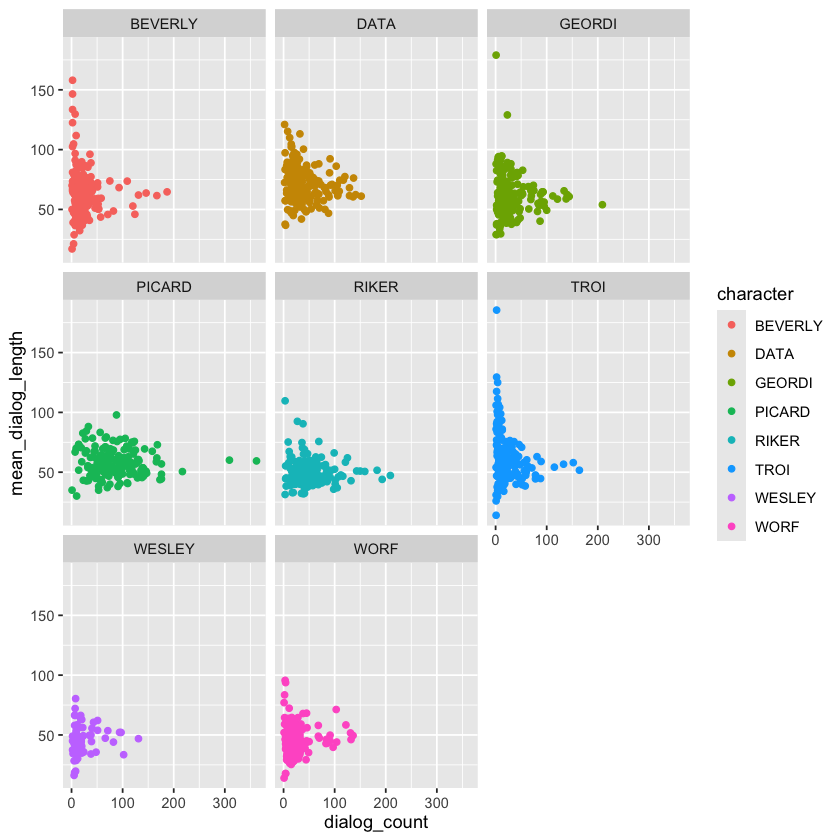

In [2]:
ggplot(dialog_len_per_ep, aes(dialog_count, mean_dialog_length)) + 
    geom_point(aes(color=character)) + 
    facet_wrap(~character)

Type 1: Commander roles (Picard, Riker, Data, Geordi): Their plots have high dialog counts but shorter average lengths, meaning that they speak often and concisely. This implies that they are decision-makers.
Type 2: Support roles (Beverly, Troi): They speak less often but with longer dialog, meaning that they are in a supportive roles in advisory and emotional scenes.
Type 3: Secondary roles (Wesley, Worf): These characters have lower dialog count and shorter lines, meaning that they contribute only occasionally without dominating conversations.

## Question 2
#### a) Compare Beverly's mean dialog per episode vs. mean dialog count per episode from season 1 (episodes 102-126) to season 3 (episodes 149-174) in a table.  
*Hints*:  
-   First, use `filter()` to get - 1) the dialog from only Beverly's character and 2) the episodes within the ranges given.
-   Then, add a season variable using `mutate()` with `case_when()`.
-   To create the means per episode, after your `mutate()` step, you'll need to `group_by()` season and episode number, then you can do your `summarize()` step to get the means by episode. At the end of the `summary()` statement (inside the parenthesis), add `.groups="drop"`. 
-   Then, to get the mean of means, you'll do the same as above, but only grouping by season. 

In [3]:
by_episode <- 
    dialog_len_per_ep %>% filter(character=='BEVERLY') %>% 
    filter((episode_number>=102)&(episode_number<=126) |(episode_number>=149)&(episode_number<=174)) %>%
    mutate(season = case_when(
        (episode_number>=102)&(episode_number<=126) ~ 1,
        (episode_number>=149)&(episode_number<=174) ~ 3
    )) %>%
    group_by(season, episode_number) %>%
    summarize(
        across(
            c(mean_dialog_length, dialog_count),
            mean
        ),
        .groups = "drop"
    )
by_season <- by_episode %>% 
    group_by(season) %>%
    summarize(
        across(
            c(mean_dialog_length, dialog_count),
            mean
        ),
        .groups = "drop"
    )
by_episode
by_season

season,episode_number,mean_dialog_length,dialog_count
<dbl>,<dbl>,<dbl>,<dbl>
1,102,56.74194,31
1,103,58.82222,45
1,104,55.64706,17
1,105,69.20000,10
1,106,57.54545,11
1,107,36.60000,10
1,108,43.63158,57
1,109,45.73333,30
1,110,50.25000,52


season,mean_dialog_length,dialog_count
<dbl>,<dbl>,<dbl>
1,56.48460,25.40
3,67.04817,19.64


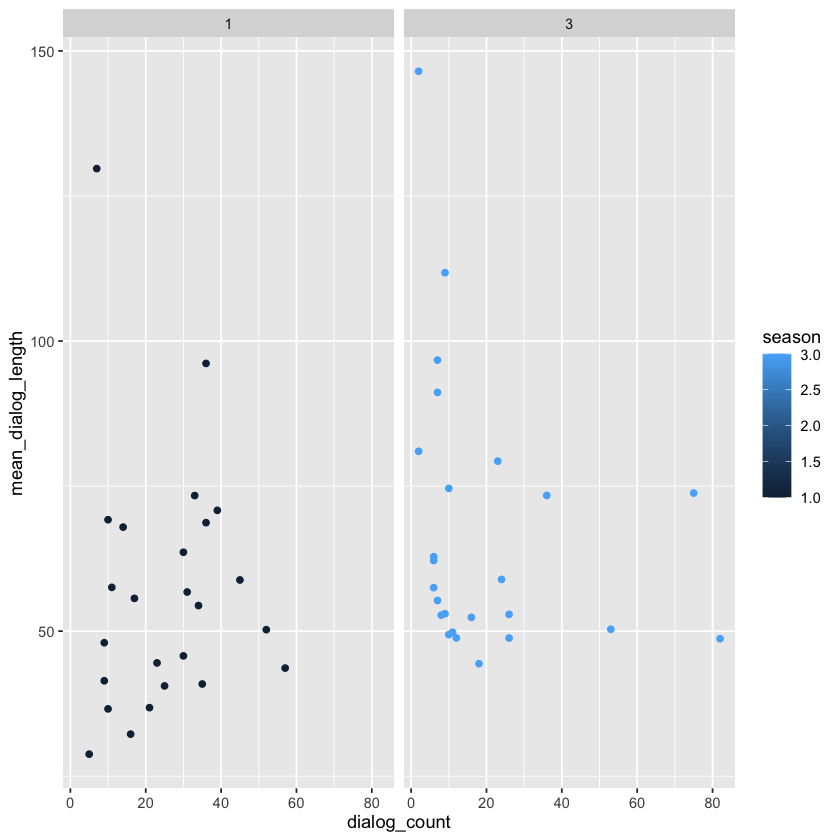

In [4]:
ggplot(by_episode, aes(dialog_count, mean_dialog_length)) + 
    geom_point(aes(color=season)) + 
    facet_wrap(~season)

#### b) In class, we talked about this character saying the actress has stated that after she was fired and rehired, the writers began giving her storylines that made her feel like a male character. How is this reflected in our table?

Average dialog per episode is longer and less frequent in episode 3 comparing with episode 1, meaning that she has less supportive sentences and more dominate lines. 

## Question 3
Let's compare the vocabulary richness (unique words / total words) of each character. 
#### a) Tokenize dialog into words, remove punctuation, convert to lowercase. Then filter out the stop words in the list below (from https://gist.github.com/sebleier/554280).
*Hint*: Here's a template for that this step should look like:
```
tokens <- YOUR_DATASET %>%
  # Split each dialog into words
  mutate(word_list = str_split(DIALOG_COLUMN, "\\s+")) %>%
  
  # Unnest the list column so each word is a row
  unnest(word_list) %>%
  
  # Clean words
  mutate(
    word = str_remove_all(word_list, "[[:punct:]]"),  # Remove punctuation
    word = str_to_lower(word)                         # Convert to lowercase
  ) %>%
  
  # Remove empty strings and stopwords
  filter(word != "", !word %in% STOPWORDS)
```

In [6]:
stop_words <- c(
  "i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself",
  "yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself",
  "they","them","their","theirs","themselves","what","which","who","whom","this","that",
  "these","those","am","is","are","was","were","be","been","being","have","has","had",
  "having","do","does","did","doing","a","an","the","and","but","if","or","because","as",
  "until","while","of","at","by","for","with","about","against","between","into","through",
  "during","before","after","above","below","to","from","up","down","in","out","on","off",
  "over","under","again","further","then","once","here","there","when","where","why","how",
  "all","any","both","each","few","more","most","other","some","such","no","nor","not",
  "only","own","same","so","than","too","very","s","t","can","will","just","don","should","now"
)

In [11]:
tokens <- dialogs_fixed %>%
  # Split each dialog into words
  mutate(word_list = str_split(dialog, "\\s+")) %>%
  
  # Unnest the list column so each word is a row
  unnest(word_list) %>%
  
  # Clean words
  mutate(
    word = str_remove_all(word_list, "[[:punct:]]"),  # Remove punctuation
    word = str_to_lower(word)                         # Convert to lowercase
  ) %>%
  
  # Remove empty strings and stopwords
  filter(word != "", !word %in% stop_words)
head(tokens)

episode_number,character,dialog,dialog_length,word_list,word
<dbl>,<chr>,<chr>,<int>,<chr>,<chr>
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,Captain's,captains
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,"log,",log
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,stardate,stardate
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,42353.7.,423537
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,destination,destination
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,planet,planet


#### b) Count unique words per character. Print a summary table with the following columns: character, total words, unique words, and vocabulary richness.  
*Hint*: Group by character, then use `summarize()` to get what you want. You'll use `n_distinct()` to get the unique word counts. Arrange in descending value of vocabulary richness.

In [14]:
vocab <- tokens %>%
  group_by(character) %>%
  summarize(
    total_words = n(),
    unique_words = n_distinct(word),
    vocabulary_richness = unique_words / total_words
  ) %>%
  arrange(desc(vocabulary_richness))

In [15]:
vocab

character,total_words,unique_words,vocabulary_richness
<chr>,<int>,<int>,<dbl>
WESLEY,7601,2291,0.3014077
WORF,18820,4318,0.2294368
TROI,19450,4187,0.2152699
BEVERLY,22900,4875,0.2128821
DATA,45462,8593,0.1890150
GEORDI,31978,5465,0.1708987
RIKER,41827,6458,0.1543979
PICARD,79214,9272,0.1170500


#### c) Plot total words versus vocab richness. 
-   Use the character names as the "points".
    -   *Hint*: Use `geom_text()` to add the character names as the points.
-   Do not include a legend.
    -   *Hint*: Use `theme()` to remove the legend.
-   Add a title and axis titles.
    -   *Hint*: Use `labs()` to add titles.

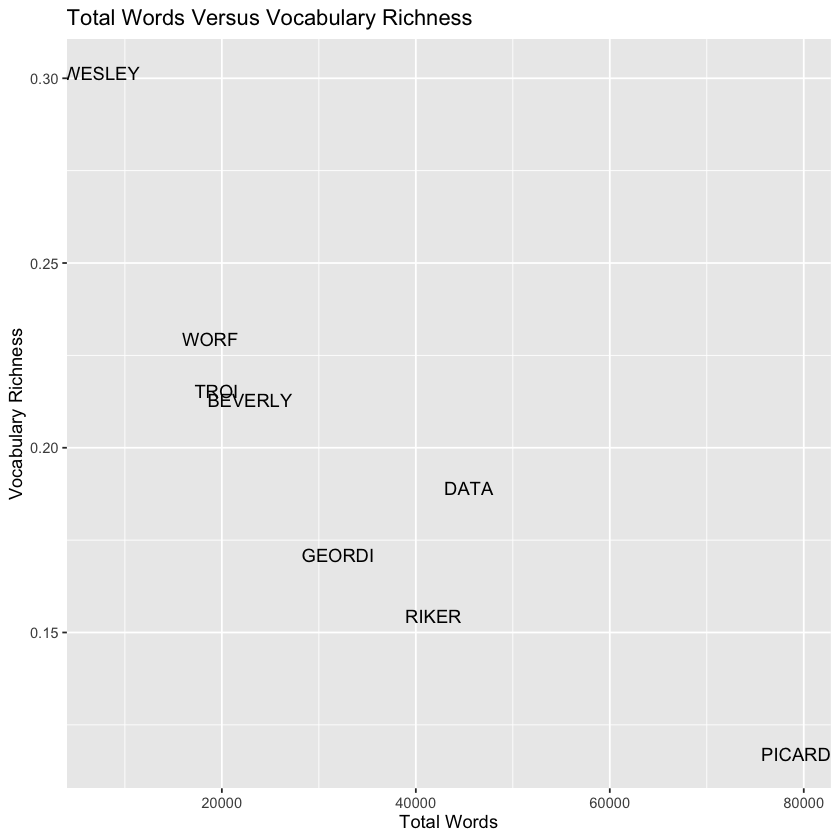

In [24]:
ggplot(vocab, aes(total_words, vocabulary_richness)) + 
  geom_text(aes(label = character)) + 
  theme(legend.position = "none") +
  labs(
    title = "Total Words Versus Vocabulary Richness",
    x = "Total Words",
    y = "Vocabulary Richness"
  )

#### d) Interpret these results. 

Vocab richness is negatively correlated with total words. This means that characters who speaks less in the show tend to use a more diverse vocabulary. Conversely, characters who speaks a lot often have less varied vocabulary. We can infer that characters who speaks more might rely on similar sentence structures or talk about recurring themes. In contrast, the characters who speaks less might use a more diversed language and talk about wider range of topics. This is possibly because the main characters focus on the central themes of the show, while side characters introduce subplots or side stories that are different from the main narrative. 

## Question 4
#### a) Find what episode Wesley left the show as a main character and state it explicitly. Meaning, find the first significant gap where he is not found in more than two episodes in a row. 
*Hint*: It's after season 3 (ended at episode 174), so you can filter out seasons 1-3 and print Wesley's dialog count per episode. Then, scan the table for the gap. 

In [40]:
dialog_len_per_ep %>% filter(character=='WESLEY') %>% 
    filter(episode_number>=174) %>%
    group_by(episode_number) %>%
    summarize(
        across(
            c(dialog_count),
            mean
        ),
        .groups = "drop"
    )    

episode_number,dialog_count
<dbl>,<dbl>
174,15
175,18
176,6
177,9
178,6
179,38
181,2
183,94
206,131


#### b) After Wesley leaves the main cast, in which episodes does he make cameo appearances?

We can see from the table that there's a large gap between episode 183 and 206. This implies that the cameo appearance is in episode 206. 

#### c) Dig back into the data. Print:
-   Wesley's last piece of dialog before he left the main cast.
-   Wesley's last piece of dialog ever.  
  
*Hint*: To do this, you'll need to filter the `dialogs_fixed` data set to Welsey's lines and the episode number, and use `slice_tail(n = 1)` to get the last observation.

In [45]:
# last line before he left main cast
dialogs_fixed %>% filter(character=='WESLEY' & episode_number==183) %>% slice_tail(n = 1)
# last line ever
dialogs_fixed %>% filter(character=='WESLEY' & episode_number==272) %>% slice_tail(n = 1)

episode_number,character,dialog,dialog_length
<dbl>,<chr>,<chr>,<int>
183,WESLEY,I can walk.,11


episode_number,character,dialog,dialog_length
<dbl>,<chr>,<chr>,<int>
272,WESLEY,"Good-bye, Mom.",14


## Question 5
Create a heatmap with `dialog_len_per_ep` showing mean dialog length per episode for each character. Sort the characters on the y-axis by their overall mean dialog length, with the lowest on top using a factor. Add a title and an axis title. 
*Hints*:
For the factor:
1. Compute overall mean (mean of mean) dialog length per character (`group_by()` then `summarize()`), and arrange the overall mean in ascending order. Add `pull(character)` to the end of this step so that you can use character as a factor in the next step. Store all of this in a new tibble.
2. Convert character to factor with this order. On `dialog_len_per_ep`, you'll use a mutate statement to add the factor `(mutate(character = factor(character, levels = DATAFROMHINT1))`.
3. Create heatmap using `geom_tile()`.
4. If you want nicer colors, you can add `scale_fill_viridis_c()` (or another color scale) to your ggplot statement. **Not required**, but fun to mess around with!

In [46]:
head(dialog_len_per_ep, 10)

character,episode_number,mean_dialog_length,dialog_count
<chr>,<dbl>,<dbl>,<int>
TROI,129,185.5000,2
GEORDI,249,179.0000,1
BEVERLY,242,158.0000,2
BEVERLY,159,146.5000,2
BEVERLY,261,133.5000,2
BEVERLY,116,129.7143,7
TROI,135,129.5000,2
GEORDI,162,129.0000,23
TROI,199,125.0000,4


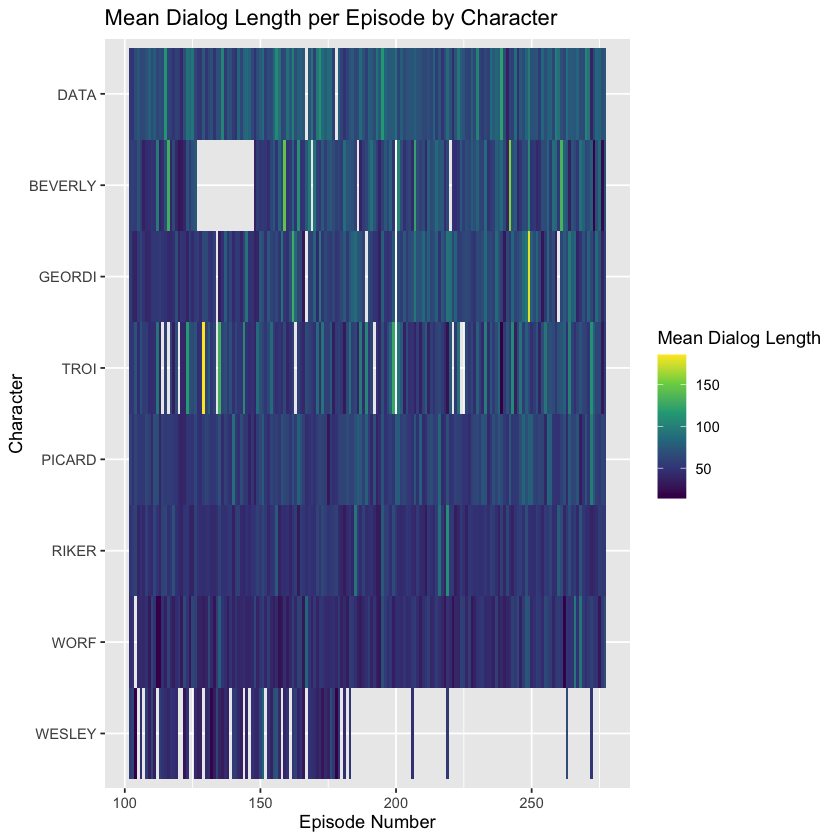

In [66]:
order <- dialog_len_per_ep %>%
  group_by(character) %>%
  summarize(overall_mean = mean(mean_dialog_length)) %>%
  arrange(overall_mean) %>%
  pull(character)
factor <- dialog_len_per_ep %>% mutate(character = factor(character, levels = order))

ggplot(factor, aes(episode_number, character, fill = mean_dialog_length)) +
    geom_tile() +
    scale_fill_viridis_c() +
    labs(
        title = "Mean Dialog Length per Episode by Character",
        x = "Episode Number",
        y = "Character",
        fill = "Mean Dialog Length"
      )